# KnnDtw Testing

A KnnDtw classifier will be tested using HAR dataset as described in [this GitHub repository](https://github.com/markdregan/K-Nearest-Neighbors-with-Dynamic-Time-Warping/blob/master/K_Nearest_Neighbor_Dynamic_Time_Warping.ipynb).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from knn_dtw.knn_dtw_clf import KnnDtw

#### Import the HAR dataset

In [3]:
# Import the HAR dataset
x_train_file = open('data/UCI-HAR-Dataset/train/X_train.txt', 'r')
y_train_file = open('data/UCI-HAR-Dataset/train/y_train.txt', 'r')

x_test_file = open('data/UCI-HAR-Dataset/test/X_test.txt', 'r')
y_test_file = open('data/UCI-HAR-Dataset/test/y_test.txt', 'r')

In [4]:
# Create empty lists
x_train = []
y_train = []
x_test = []
y_test = []

# Mapping table for classes
labels = {1:'WALKING', 2:'WALKING UPSTAIRS', 3:'WALKING DOWNSTAIRS',
          4:'SITTING', 5:'STANDING', 6:'LAYING'}

# Loop through datasets
for x in x_train_file:
    x_train.append([float(ts) for ts in x.split()])
    
for y in y_train_file:
    y_train.append(int(y.rstrip('\n')))
    
for x in x_test_file:
    x_test.append([float(ts) for ts in x.split()])
    
for y in y_test_file:
    y_test.append(int(y.rstrip('\n')))
    
# Convert to numpy for efficiency
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

#### Visualizing sample observations from the HAR dataset

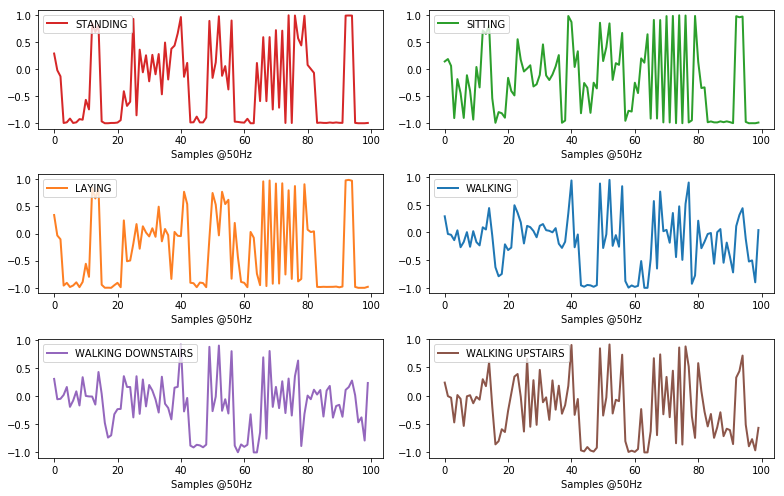

In [5]:
plt.figure(figsize=(11,7))
colors = ['#D62728','#2C9F2C','#FD7F23','#1F77B4','#9467BD',
          '#8C564A','#7F7F7F','#1FBECF','#E377C2','#BCBD27']

for i, r in enumerate([0,27,65,100,145,172]):
    plt.subplot(3,2,i+1)
    plt.plot(x_train[r][:100], label=labels[y_train[r]], color=colors[i], linewidth=2)
    plt.xlabel('Samples @50Hz')
    plt.legend(loc='upper left')
    plt.tight_layout()

#### Model Performance

In [6]:
m = KnnDtw(n_neighbors=1)
m.fit(x_train[::10], y_train[::10])
label = m.predict(x_test[::10])

                    precision    recall  f1-score   support

           WALKING       0.98      0.82      0.89        60
  WALKING UPSTAIRS       0.92      0.85      0.88        52
WALKING DOWNSTAIRS       0.68      1.00      0.81        30
           SITTING       0.75      0.84      0.79        45
          STANDING       0.94      0.77      0.85        61
            LAYING       0.90      1.00      0.95        47

       avg / total       0.88      0.86      0.87       295



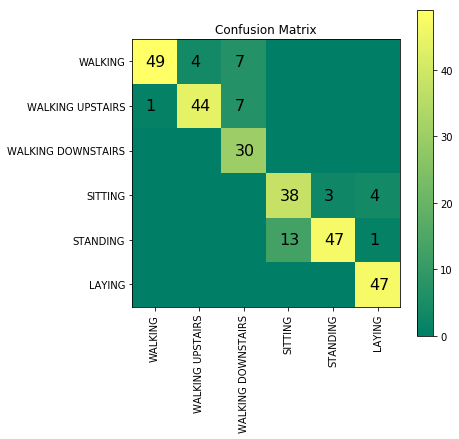

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(label, y_test[::10], target_names=[l for l in labels.values()]))

conf_mat = confusion_matrix(label, y_test[::10])

fig = plt.figure(figsize=(6,6))
width = np.shape(conf_mat)[1]
height = np.shape(conf_mat)[0]

res = plt.imshow(np.array(conf_mat), cmap=plt.cm.summer, interpolation='nearest')
for i, row in enumerate(conf_mat):
    for j, c in enumerate(row):
        if c > 0:
            plt.text(j-.2, i+.1, c, fontsize=16)
            
cb = fig.colorbar(res)
plt.title('Confusion Matrix')
_ = plt.xticks(range(6), [l for l in labels.values()], rotation=90)
_ = plt.yticks(range(6), [l for l in labels.values()])